In [688]:
# 디렉토리 설정
import os

os.chdir('C:\\Users\\rbden\\OneDrive\\바탕 화면\\Univ\\R & Python\\Python\\Pythondata')

os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [689]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [690]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [691]:
def load_data():
    data = pd.read_csv('train_0804.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [692]:
train_x, train_y, test_x, test_y = load_data()

## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [693]:
train_x

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0
...,...,...,...,...,...
83,23.9,2.8,68.0,0.0,0.6
84,25.0,3.1,63.0,0.0,0.8
85,26.0,3.1,60.0,0.0,1.0
86,26.4,3.8,60.0,0.0,1.0


### (1) 변수별 그래프 확인

#### a. 독립변수

Text(0.5, 1.0, '환경 변수 중, 온도 대한 Kernel Density Plot')

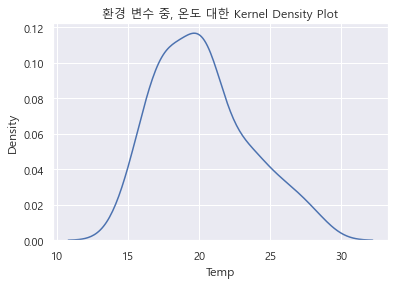

In [694]:
#### seaborn 폰트 꺠짐 해결
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

sns.kdeplot(train_x['Temp'])
plt.title("환경 변수 중, 온도 대한 Kernel Density Plot")

Text(0.5, 1.0, '환경 변수 중, 바람 대한 Kernel Density Plot')

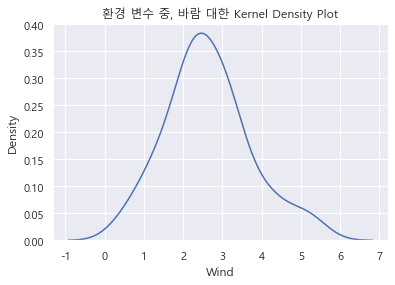

In [695]:
#### seaborn 폰트 꺠짐 해결
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

sns.kdeplot(train_x['Wind'])
plt.title("환경 변수 중, 바람 대한 Kernel Density Plot")

Text(0.5, 1.0, '환경 변수 중, 습도 대한 Kernel Density Plot')

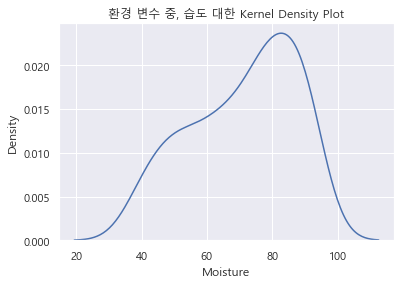

In [696]:
#### seaborn 폰트 꺠짐 해결
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

sns.kdeplot(train_x['Moisture'])
plt.title("환경 변수 중, 습도 대한 Kernel Density Plot")

Text(0.5, 1.0, '환경 변수 중, 강수량 대한 Kernel Density Plot')

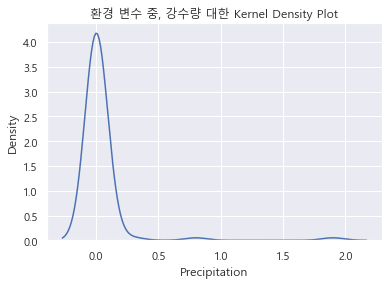

In [697]:
#### seaborn 폰트 꺠짐 해결
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

sns.kdeplot(train_x['Precipitation'])
plt.title("환경 변수 중, 강수량 대한 Kernel Density Plot")

Text(0.5, 1.0, '환경 변수 중, 햇빛 대한 Kernel Density Plot')

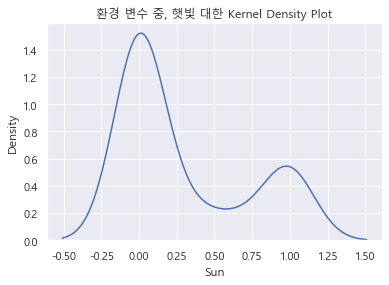

In [698]:
#### seaborn 폰트 꺠짐 해결
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

sns.kdeplot(train_x['Sun'])
plt.title("환경 변수 중, 햇빛 대한 Kernel Density Plot")

#### b. 종속변수

Text(0.5, 1.0, '전력 사용량에 대한 Kernel Density Plot')

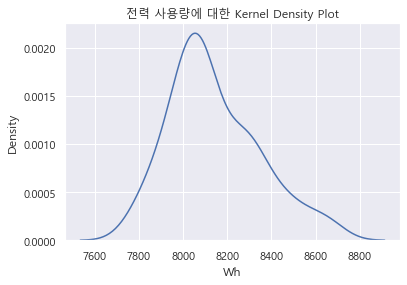

In [699]:
#### seaborn 폰트 꺠짐 해결
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

sns.kdeplot(train_y)
plt.title("전력 사용량에 대한 Kernel Density Plot")

### (2) 상관계수 파악

In [700]:
train_df = train_x.copy()

train_df.insert(5 , 'Elec power' , train_y)

train_df

,Temp,Wind,Moisture,Precipitation,Sun,Elec power
0,17.6,2.5,92.0,0.8,0.0,8179.056
1,17.7,2.9,91.0,0.3,0.0,8135.640
2,17.5,3.2,91.0,0.0,0.0,8107.128
3,17.1,3.2,91.0,0.0,0.0,8048.808
4,17.0,3.3,92.0,0.0,0.0,8043.624
...,...,...,...,...,...,...
83,23.9,2.8,68.0,0.0,0.6,8386.416
84,25.0,3.1,63.0,0.0,0.8,8435.664
85,26.0,3.1,60.0,0.0,1.0,8591.184
86,26.4,3.8,60.0,0.0,1.0,8638.488


In [701]:
train_df.corr()

,Temp,Wind,Moisture,Precipitation,Sun,Elec power
Temp,1.000000,0.510935,-0.628642,-0.173210,0.783829,0.803301
Wind,0.510935,1.000000,-0.478825,0.028617,0.544720,0.349288
Moisture,-0.628642,-0.478825,1.000000,0.152529,-0.699047,-0.095042
Precipitation,-0.173210,0.028617,0.152529,1.000000,-0.123846,-0.090389
Sun,0.783829,0.544720,-0.699047,-0.123846,1.000000,0.458348
Elec power,0.803301,0.349288,-0.095042,-0.090389,0.458348,1.000000


최종 선택 변수 -> Temp , WInd , Sun 

(1) Temp : 전력 사용량과의 상관계수가 대략 0.80 강한 양의 상관관계를 보임 <br>
(2) Sun : 전력 사용량과 강한 양의 상관관계를 보이는 Temp와의 상관계수가 대략 0.78로 강한 양의 상관관계를 보임 <br>
(3) Wind : 전력 사용량과 직접적인 상관관계는 강력하진 않으나 Temp와 Sun과의 상관관계를 무시할 수 없음 

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

### (1) 사용할 변수 선택

#### a. train_set

In [702]:
x_train = train_x[['Temp' , 'Wind' , 'Sun']].copy()

x_train

,Temp,Wind,Sun
0,17.6,2.5,0.0
1,17.7,2.9,0.0
2,17.5,3.2,0.0
3,17.1,3.2,0.0
4,17.0,3.3,0.0
...,...,...,...
83,23.9,2.8,0.6
84,25.0,3.1,0.8
85,26.0,3.1,1.0
86,26.4,3.8,1.0


#### b. test_set

In [703]:
x_test = test_x[['Temp' , 'Wind' , 'Sun']].copy()

x_test

,Temp,Wind,Sun
88,24.3,3.6,0.0
89,23.2,4.1,0.1
90,22.8,3.1,0.2
91,21.7,3.3,0.0
92,21.4,2.5,0.0
93,20.8,1.9,0.0
94,20.3,1.6,0.0
95,19.9,1.4,0.0
96,19.7,2.0,0.0
97,19.5,1.4,0.0


### (2) Scaling

#### a. train_set

In [704]:
# 사용할 패키지를 import!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(x_train)
processed_data_train = scaler.transform(x_train)

processed_data_train = pd.DataFrame(processed_data_train)
processed_data_train.columns = ['scaled Temp' , 'scaled Wind' , 'scaled Sun']

processed_data_train

,scaled Temp,scaled Wind,scaled Sun
0,0.208955,0.411765,0.0
1,0.216418,0.490196,0.0
2,0.201493,0.549020,0.0
3,0.171642,0.549020,0.0
4,0.164179,0.568627,0.0
...,...,...,...
83,0.679104,0.470588,0.6
84,0.761194,0.529412,0.8
85,0.835821,0.529412,1.0
86,0.865672,0.666667,1.0


#### b. test_set

In [705]:
scaler = MinMaxScaler()
scaler = scaler.fit(x_test)
processed_data_test = scaler.transform(x_test)

processed_data_test = pd.DataFrame(processed_data_test)
processed_data_test.columns = ['scaled Temp' , 'scaled Wind' , 'scaled Sun']

processed_data_test

,scaled Temp,scaled Wind,scaled Sun
0,1.00,0.814815,0.0
1,0.78,1.000000,0.5
2,0.70,0.629630,1.0
3,0.48,0.703704,0.0
4,0.42,0.407407,0.0
5,0.30,0.185185,0.0
6,0.20,0.074074,0.0
7,0.12,0.000000,0.0
8,0.08,0.222222,0.0
9,0.04,0.000000,0.0


# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

### (1) Linear Regression

In [706]:
# 사용할 패키지를 import!
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성 후 fitting 시킵니다.
lr = LinearRegression()
lr.fit(processed_data_train, train_y)

LinearRegression()

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [707]:
train_pred = lr.predict(processed_data_train)

train_pred

array([8017.08587415, 8024.54199916, 8010.51408421, 7981.97588972,
       7974.92173519, 7967.86758067, 7953.59848342, 7945.1263302 ,
       7966.42737797, 7985.05321653, 8006.14217706, 8120.45574322,
       8192.12280583, 8193.0071409 , 8228.67988402, 8243.27055765,
       8284.06799696, 8228.11712534, 8163.66500544, 8063.86171882,
       8086.61828224, 8088.43136038, 8038.08754953, 7988.14570917,
       7945.01684105, 7915.83549378, 7894.67303021, 7879.84117428,
       7865.97404752, 7816.35378355, 7831.34642767, 7866.37601801,
       7902.6919139 , 7967.14403379, 7995.68222828, 8010.03171963,
       7924.65831844, 8009.71014324, 8195.47868477, 8252.28479641,
       8287.74545228, 8274.57277735, 8231.04193874, 8210.04026335,
       8181.66285706, 8159.9376348 , 8138.13201845, 8116.32640209,
       8073.51911036, 8066.62574403, 8059.33040721, 8058.92843672,
       8051.95467629, 8051.7938881 , 8015.39759811, 8000.89420962,
       7969.79718612, 8156.59706882, 8286.40784768, 8343.67411

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [708]:
def mse(pred, true) :
    
    return np.mean((pred-true)**2)

In [709]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"Linear {train_mse:.5f}")

Linear 11423.02779


In [710]:
def visualize(model, x, y) :
    
    if x.shape[1] != 1:
        
        return None
    
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

In [711]:
# visualization 하실 분은 진행해주세요!
# visualize(model, train_x, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [712]:
# y1_hat에 predict값 할당
test_pred = lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [713]:
def score(train_mse, test_mse) :
    
    result = round(test_mse/train_mse , 4)
    
    return(result)

In [714]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"Linear {test_mse:.5f}")

Linear 317126.36032


In [715]:
# score(train_mse,test_mse)
lr_score = score(train_mse , test_mse)

lr_score

27.762

### (2) Ridge Regression

In [716]:
# 사용할 패키지를 import!
from sklearn.linear_model import Ridge

# 선형회귀 모델 생성 후 fitting 시킵니다.
L1_lr = Ridge()
L1_lr.fit(processed_data_train, train_y)

Ridge()

In [717]:
# visualization 하실 분은 진행해주세요!
# visualize(model, test_x, test_y)

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [718]:
train_pred = L1_lr.predict(processed_data_train)

train_pred

array([8038.03078449, 8045.15909221, 8037.67861927, 8019.02159566,
       8014.97335272, 8010.92510977, 8001.59659797, 7997.2965542 ,
       8031.73016067, 8066.89219141, 8110.31419136, 8186.17431167,
       8235.28092249, 8242.05706498, 8265.37834448, 8277.17090809,
       8289.75611966, 8261.0662538 , 8217.23991184, 8152.55634219,
       8113.23476197, 8084.6733435 , 8048.94348743, 8016.29369612,
       7985.84410891, 7962.25898168, 7950.11425284, 7936.47365036,
       7930.22520333, 7900.03946384, 7914.91209222, 7933.3052681 ,
       7961.55465123, 8005.38099319, 8024.03801679, 8033.98254155,
       7979.8595096 , 8031.51848973, 8165.47361434, 8190.10319034,
       8222.41286332, 8210.87210053, 8177.34244855, 8166.42974561,
       8149.00474792, 8132.54792841, 8115.47509594, 8098.40226347,
       8070.41672807, 8067.60051103, 8061.70422922, 8058.62416445,
       8055.19193446, 8053.95990855, 8025.09451247, 8045.81124587,
       8071.22837589, 8149.40510076, 8222.77707545, 8272.15958

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [719]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"L1 Regression : {train_mse:.5f}")

L1 Regression : 13881.14065


# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [720]:
# y1_hat에 predict값 할당
test_pred = L1_lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [721]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"L1 Regression : {test_mse:.5f}")

L1 Regression : 290334.18345


In [722]:
# score(train_mse,test_mse)
L1_lr_score = score(train_mse , test_mse)

L1_lr_score

20.9157

### (3) Lasso Regression

In [723]:
# 사용할 패키지를 import!
from sklearn.linear_model import Lasso

# 선형회귀 모델 생성 후 fitting 시킵니다.
L2_lr = Lasso()
L2_lr.fit(processed_data_train, train_y)

Lasso()

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [724]:
train_pred = L2_lr.predict(processed_data_train)

train_pred

array([8019.11648555, 8025.77949772, 8012.45347339, 7985.80142474,
       7979.13841258, 7972.47540041, 7959.14937609, 7954.24092768,
       7977.73909167, 8004.74638318, 8029.99911093, 8136.60730554,
       8203.23742717, 8203.23742717, 8236.55248799, 8249.87851232,
       8289.85658529, 8236.55248799, 8176.58537852, 8083.30320824,
       8092.7648622 , 8085.74660719, 8039.10552204, 7992.4644369 ,
       7952.48636392, 7925.83431527, 7905.84527878, 7892.51925445,
       7879.19323013, 7832.55214499, 7845.87816931, 7879.19323013,
       7912.50829094, 7972.47540041, 7999.12744906, 8012.45347339,
       7932.49732743, 8012.45347339, 8187.44635339, 8238.99588694,
       8274.06551151, 8258.98492343, 8219.00685045, 8199.01781396,
       8172.36576531, 8152.37672882, 8132.38769233, 8112.39865584,
       8072.42058286, 8065.7575707 , 8059.09455853, 8059.09455853,
       8052.43154637, 8052.43154637, 8019.11648555, 8011.05415249,
       7994.92948636, 8159.39498383, 8275.82007526, 8330.87873

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [725]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"L2 Regression : {train_mse:.5f}")

L2 Regression : 11523.08338


# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [726]:
# y1_hat에 predict값 할당
test_pred = L2_lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [727]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"L2 Regression : {test_mse:.5f}")

L2 Regression : 310372.56889


In [728]:
# score(train_mse,test_mse)
L2_lr_score = score(train_mse , test_mse)

L2_lr_score

26.9349

### (4) Random Forest

In [729]:
# 사용할 패키지를 import!
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# 선형회귀 모델 생성 후 fitting 시킵니다.
rf_lr = RandomForestRegressor()
rf_lr.fit(processed_data_train, train_y)

RandomForestRegressor()

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [730]:
train_pred = rf_lr.predict(processed_data_train)

train_pred

array([8117.02944   , 8129.5488    , 8087.48064   , 8047.64808   ,
       8035.2972    , 8006.33808   , 7983.53496   , 7984.21536   ,
       8045.72352   , 8106.16248   , 8094.654     , 8090.02728   ,
       8074.60488   , 8094.79008   , 8085.05712   , 8127.61128   ,
       8156.28528   , 8040.21552   , 8051.73048   , 8050.5576    ,
       8029.93176   , 8033.08104   , 8009.0208    , 7952.3532    ,
       7929.35568   , 7893.34632   , 7867.368     , 7848.20016   ,
       7816.52592   , 7802.47728   , 7803.22896   , 7829.17488   ,
       7873.51104   , 7941.564     , 7974.612     , 8009.51328   ,
       7925.40936   , 7966.9332    , 8066.35584   , 8074.03464   ,
       8076.5424    , 8126.97624   , 8121.9348    , 8131.77792   ,
       8113.56912   , 8101.04328   , 8126.01072   , 8118.35136   ,
       8107.14744   , 8082.7308    , 8089.83936   , 8083.74816   ,
       8059.0464    , 8052.57936   , 8045.0172    , 8093.09232   ,
       8131.35672   , 8187.75864   , 8208.59184   , 8259.00624

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [731]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"Random Forest {train_mse:.5f}")

Random Forest 1365.13352


# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [732]:
# y1_hat에 predict값 할당
test_pred = rf_lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [733]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"Random Forest : {test_mse:.5f}")

Random Forest : 341172.38922


In [734]:
# score(train_mse,test_mse)
rf_lr_score = score(train_mse , test_mse)

rf_lr_score

249.9187

### (5) Gradient Boosting

In [735]:
# 사용할 패키지를 import!
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# 선형회귀 모델 생성 후 fitting 시킵니다.
gb_lr = GradientBoostingRegressor()
gb_lr.fit(processed_data_train, train_y)

GradientBoostingRegressor()

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [736]:
train_pred = gb_lr.predict(processed_data_train)

train_pred

array([8109.69737018, 8117.05014978, 8075.43764504, 8049.29987774,
       8037.09438544, 8011.28001977, 8003.49737932, 7991.18982357,
       8020.93553237, 8094.63409603, 8117.94255014, 8100.48855674,
       8093.23359461, 8094.18805537, 8090.32378637, 8081.65011103,
       8051.28987393, 8031.10404676, 8050.71575476, 8025.11817706,
       8019.04689398, 8046.89882417, 8007.6860167 , 7950.19905391,
       7906.30512957, 7878.71562108, 7861.74603752, 7847.04393922,
       7812.06482881, 7805.44786481, 7798.28192806, 7829.99598045,
       7866.07804931, 7954.96386368, 7982.7913274 , 7996.7178247 ,
       7936.00975203, 7965.66980473, 8034.00195287, 8036.57352127,
       8066.74599569, 8105.43116392, 8130.19886111, 8144.60704005,
       8085.82951068, 8109.10247751, 8115.27759273, 8119.06810475,
       8089.54238379, 8097.91007658, 8088.03943916, 8088.03943916,
       8047.28451587, 8047.28451587, 8028.6452352 , 8092.30829369,
       8137.19546201, 8200.89397846, 8257.99860018, 8253.40100

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [737]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"Gradient Boosting : {train_mse:.5f}")

Gradient Boosting : 800.35115


# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [738]:
# y1_hat에 predict값 할당
test_pred = gb_lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [739]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"Gradient Boosting : {test_mse:.5f}")

Gradient Boosting : 356552.06274


In [740]:
# score(train_mse,test_mse)
gb_lr_score = score(train_mse , test_mse)

gb_lr_score

445.4945

### (6) Xgboost

In [741]:
# 사용할 패키지를 import!
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# 선형회귀 모델 생성 후 fitting 시킵니다.
xgb_lr = XGBRegressor()
xgb_lr.fit(processed_data_train, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [742]:
train_pred = xgb_lr.predict(processed_data_train)

train_pred

array([8178.791 , 8135.6567, 8106.9873, 8048.86  , 8043.6436, 8010.4175,
       7978.2666, 8018.9873, 8020.961 , 8083.217 , 8116.1987, 8104.527 ,
       8088.9595, 8102.485 , 8088.428 , 8076.68  , 8032.588 , 8013.81  ,
       8029.498 , 8028.072 , 7994.3535, 7975.132 , 7973.1323, 7945.0444,
       7920.488 , 7890.0605, 7868.0225, 7847.258 , 7799.3574, 7801.9043,
       7784.504 , 7836.908 , 7873.036 , 7914.2695, 7973.5938, 7989.9707,
       7935.3984, 7923.8813, 7966.5664, 7996.335 , 8054.002 , 8061.2573,
       8059.35  , 8061.266 , 8067.0137, 8111.5854, 8140.682 , 8120.077 ,
       8114.902 , 8094.6484, 8090.4346, 8091.4688, 8057.683 , 8038.6147,
       8019.6562, 8094.8174, 8151.8096, 8201.085 , 8261.344 , 8278.191 ,
       8319.704 , 8363.744 , 8459.106 , 8483.545 , 8506.932 , 8530.942 ,
       8655.982 , 8461.491 , 8344.282 , 8322.971 , 8271.462 , 8276.199 ,
       8254.879 , 8231.125 , 8245.852 , 8257.463 , 8240.604 , 8307.994 ,
       8261.951 , 8276.199 , 8328.125 , 8347.283 , 

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [743]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"XGBoost : {train_mse:.5f}")

XGBoost : 9.78238


# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [744]:
# y1_hat에 predict값 할당
test_pred = xgb_lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [745]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"XGBoost :  {test_mse:.5f}")

XGBoost :  350491.58839


In [746]:
# score(train_mse,test_mse)
xgb_lr_score = score(train_mse , test_mse)

xgb_lr_score

35828.8596

### (7) LGBM

In [747]:
# 사용할 패키지를 import!
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

# 선형회귀 모델 생성 후 fitting 시킵니다.
lgbm_lr = LGBMRegressor()
lgbm_lr.fit(processed_data_train, train_y)

LGBMRegressor()

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [748]:
train_pred = lgbm_lr.predict(processed_data_train)

train_pred

array([8064.28063626, 8129.41778779, 7992.79563213, 7992.79563213,
       7992.79563213, 7992.79563213, 7992.79563213, 7902.82997423,
       8100.18642549, 8108.98721734, 8096.31412698, 8130.30776907,
       8338.17416229, 8338.17416229, 8338.17416229, 8338.17416229,
       8338.17416229, 8338.17416229, 8130.30776907, 8096.31412698,
       8075.84571332, 8118.6042736 , 8033.64150409, 7897.01934843,
       7897.01934843, 7897.01934843, 7897.01934843, 7897.01934843,
       7897.01934843, 7897.01934843, 7901.1464898 , 7897.01934843,
       7901.1464898 , 7927.6584806 , 7927.6584806 , 7992.79563213,
       7992.79563213, 7901.1464898 , 8174.26654969, 8163.59695739,
       8160.87758588, 8203.49791199, 8171.64031655, 8217.97532035,
       8124.85328199, 8161.38047667, 8107.0021137 , 8087.96514143,
       8087.96514143, 8061.8373525 , 8061.8373525 , 8061.8373525 ,
       8033.64150409, 8033.64150409, 8033.64150409, 8059.27927954,
       8100.8079564 , 8207.99458433, 8203.95653809, 8405.83459

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [749]:
# train_mse = mse(esti_y, train_y)
train_mse = mse(train_pred , train_y)

# print(f"Linear {train_mse:.5f}")
print(f"LigthGBM : {train_mse:.5f}")

LigthGBM : 14867.23443


# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [750]:
# y1_hat에 predict값 할당
test_pred = lgbm_lr.predict(processed_data_test)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [751]:
# test_mse = mse(pred_y, test_y)
test_mse = mse(test_pred , test_y)

# print(f"Linear {test_mse:.5f}")
print(f"LigthGBM :  {test_mse:.5f}")

LigthGBM :  319091.49960


In [752]:
# score(train_mse,test_mse)
lgbm_lr_score = score(train_mse , test_mse)

lgbm_lr_score

21.4627

# 결과 확인

In [757]:
model_list = ['Linear' , 'L1_Regression' , 'L2_Regression' , 'Random Forest' , 'Grading Boosting' , 'Xgboost' , 'Lgbm']

score_list = [lr_score , L1_lr_score , L2_lr_score , rf_lr_score , gb_lr_score , xgb_lr_score , lgbm_lr_score]

score_list

[27.762, 20.9157, 26.9349, 249.9187, 445.4945, 35828.8596, 21.4627]

In [784]:
model_score_df = pd.DataFrame(zip(model_list , score_list) , columns = ['Model' , 'Score'])

model_score_df = model_score_df.sort_values('Score')

model_score_df.reset_index(drop = True , inplace = True)

print('Score가 가장 좋은 모델 : ' , model_score_df.loc[0 , 'Model'] , ' ' ,  '&' , 
      ' ' ,'그 모델의 Score : ' , model_score_df.loc[0 , 'Score'])

model_score_df

Score가 가장 좋은 모델 :  L1_Regression   &   그 모델의 Score :  20.9157


,Model,Score
0,L1_Regression,20.9157
1,Lgbm,21.4627
2,L2_Regression,26.9349
3,Linear,27.7620
4,Random Forest,249.9187
5,Grading Boosting,445.4945
6,Xgboost,35828.8596
